<a href="https://colab.research.google.com/github/ShwetaM4414/Machine-Learning-Projects/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Getting the data

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

Data exploration

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Description of Data

In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.shape

(891, 12)

Get a count of the number of a survivors 

In [ ]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking how many cells are left empty in the table

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

drop PassengerId, Tickit, Name and cabin column

In [ ]:
train_data = train_data.drop(columns = ['PassengerId', 'Ticket', 'Name', 'Cabin'], axis = 1)
test_data = test_data.drop(columns = ['PassengerId', 'Ticket', 'Name', 'Cabin'], axis = 1)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


replacing the missing values in the age column with the mean value

In [ ]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)

finds the maximum occurred Embarked column

In [ ]:
print(train_data['Embarked'].mode())

0    S
dtype: object


replacing the missing values in the Embarked column with the mode value

In [ ]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace = True)

running the isnull command again

In [ ]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Calculating family size

In [ ]:
train_data['family_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['family_size'] = test_data['SibSp'] + test_data['Parch'] + 1

Drop Sibsp and Parch column

In [ ]:
train_data = train_data.drop(columns = ['SibSp', 'Parch'], axis = 1)
test_data = test_data.drop(columns = ['SibSp', 'Parch'], axis = 1)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


Visualizing the features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

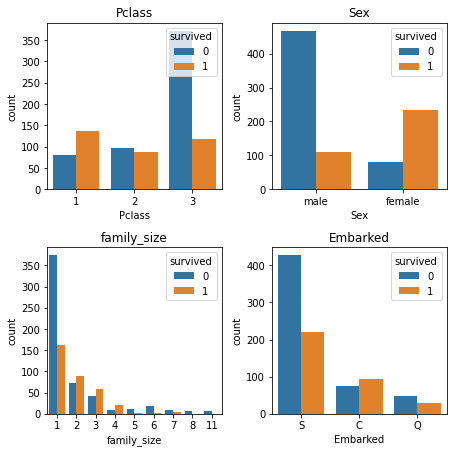

In [ ]:
cols = ['Pclass', 'Sex', 'family_size', 'Embarked']

n_rows = 2
n_cols = 2

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(train_data[cols[i]], hue=train_data['Survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout

Converting categorical column to integer type values

In [ ]:
train_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace = True)
test_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace = True)

Converting fare from float to integer type

In [ ]:
train_data['Fare'] = train_data['Fare'].fillna(0)
train_data['Fare'] = train_data['Fare'].astype(int)

test_data['Fare'] = test_data['Fare'].fillna(0)
test_data['Fare'] = test_data['Fare'].astype(int)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,0,22.0,7,0,2
1,1,1,1,38.0,71,1,2
2,1,3,1,26.0,7,0,1
3,1,1,1,35.0,53,0,2
4,0,3,0,35.0,8,0,1


Model training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
x_train = train_data.drop(columns = ['Survived'], axis = 1)
y_train = train_data['Survived']

x_test = test_data
y_t = pd.read_csv('gender_submission.csv')
y_test = y_t.drop(columns = ['PassengerId'], axis = 1)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_train_pred = random_forest.predict(x_train)

training_accuraccy = metrics.accuracy_score(y_train, y_train_pred)
print(training_accuraccy*100)



96.52076318742986


In [ ]:
y_test_pred = random_forest.predict(x_test)
testing_accuraccy = metrics.accuracy_score(y_test, y_test_pred)
print(testing_accuraccy*100)

82.77511961722487


In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[236  30]
 [ 42 110]]


In [ ]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(7)

,importance
feature,
Age,0.300
Sex,0.275
Fare,0.219
Pclass,0.090
family_size,0.082
Embarked,0.034


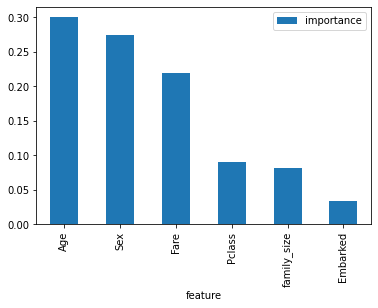

In [ ]:
importances.plot.bar()